In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('metrics_compact.csv')
df.fillna(value = 0, inplace=True)
final = pd.get_dummies(df, columns=['usergroup'],drop_first=True)
final['rating'] = final['rating'].astype('int32')
final.drop(['chat_id','conv_id'], axis=1, inplace=True)
final.head()

,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords,usergroup_default
0,1.0,9.50,4,23,True,8,3,0.0,1
1,1.0,11.00,5,77,True,8,3,2.0,1
2,1.0,19.67,4,66,False,11,4,0.0,1
3,1.0,164.00,5,844,True,9,4,4.0,1
4,1.0,152.67,4,490,True,11,5,4.0,1


In [4]:
scaler = StandardScaler()
scaler.fit(final)
scaled_data = scaler.transform(final)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape, x_pca.shape)

(657, 9) (657, 2)


Text(0, 0.5, 'Second Principal Component')

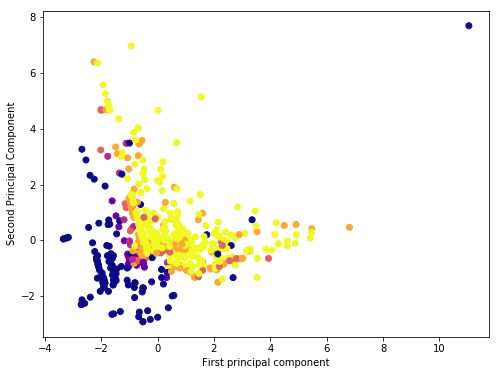

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=final['rating'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

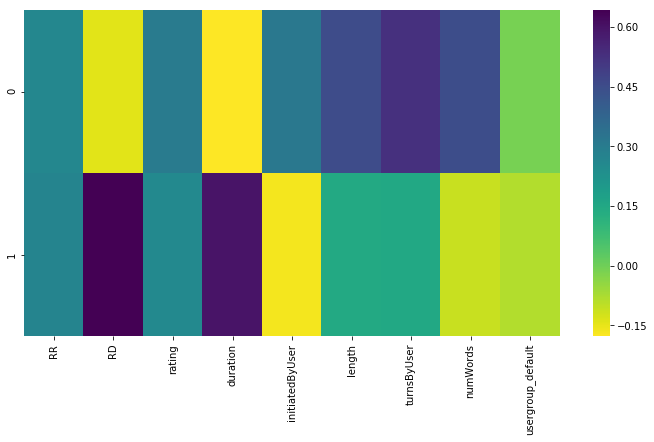

In [7]:
df_comp = pd.DataFrame(pca.components_,columns=final.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='viridis_r')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, mean_absolute_error

In [18]:
X=final.drop('rating', axis=1)
y=final['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train) 

train_for_pca = scaler.transform(X_train)
test_for_pca = scaler.transform(X_test)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [26]:
pipe = Pipeline(steps=[('scale', StandardScaler()),('pca', PCA()), ('logistic', LogisticRegression())])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [2, 4, 6,8],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.715):
{'logistic__C': 10000.0, 'pca__n_components': 6}


/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silenc

In [27]:
y_pred= search.predict(X_test)
print("RMSE: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2: ",accuracy_score(y_test, y_pred))

RMSE:  0.7719841941125453
R2:  0.7070707070707071


/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
